In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
df = pd.read_csv('rol7+4Y.csv', index_col=0)

In [5]:
df_pi = df
# kospi shifting -day
df_pi['pi_shift(1)'] = df_pi['kospi_cost'].shift(-1)
df_pi['pi2_shift(1)'] = df_pi['kospi200_cost'].shift(-1)
df_pi['daq_shift(1)'] = df_pi['kosdaq_cost'].shift(-1)
df_pi['daq1_shift(1)'] = df_pi['kosdaq100_cost'].shift(-1)

df_kospi = df_pi.drop(['kospi200_cost', 'kosdaq_cost','kosdaq100_cost',
                       'pi2_shift(1)','daq_shift(1)','daq1_shift(1)'], axis=1)

df_kosdaq = df_pi.drop(['kospi200_cost', 'kospi_cost','kosdaq100_cost',
                       'pi2_shift(1)','pi_shift(1)','daq1_shift(1)'], axis=1)

df_kospi.dropna(axis=0, inplace = True)
df_kosdaq.dropna(axis=0, inplace = True)

In [6]:
df_train = df_kospi.iloc[:-19,:]
df_test = df_kospi.iloc[-19:,:]

In [7]:
Kpi_X = df_kospi.drop(['pi_shift(1)'], axis=1)
Kpi_y = df_kospi['pi_shift(1)']

train_X = Kpi_X.iloc[:-5,:]
train_y = Kpi_y.iloc[:-5]

test_X = Kpi_X.iloc[-5:,:]
test_y = Kpi_y.iloc[-5:]

In [8]:
kospi = df_pi.drop(['kospi200_cost', 'kosdaq_cost','kosdaq100_cost',
                      'pi_shift(1)' ,'pi2_shift(1)','daq_shift(1)','daq1_shift(1)'], axis=1)

In [19]:
train= df_train['kospi_cost']
test= df_test['kospi_cost']
test_final=test.copy()

In [18]:
from pmdarima import auto_arima
stepwise_model = auto_arima(train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=2.09 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=11579.604, Time=0.15 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=11256.272, Time=0.47 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.46 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=11580.353, Time=0.17 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=11139.738, Time=1.10 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=4.22 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.88 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=11137.815, Time=0.70 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=11254.552, Time=0.35 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=1.77 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.86 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=11139.752, Time=0.85 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=11139.545, Time=1.58 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AI

C:\anaconda3\envs\bhoon\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\anaconda3\envs\bhoon\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


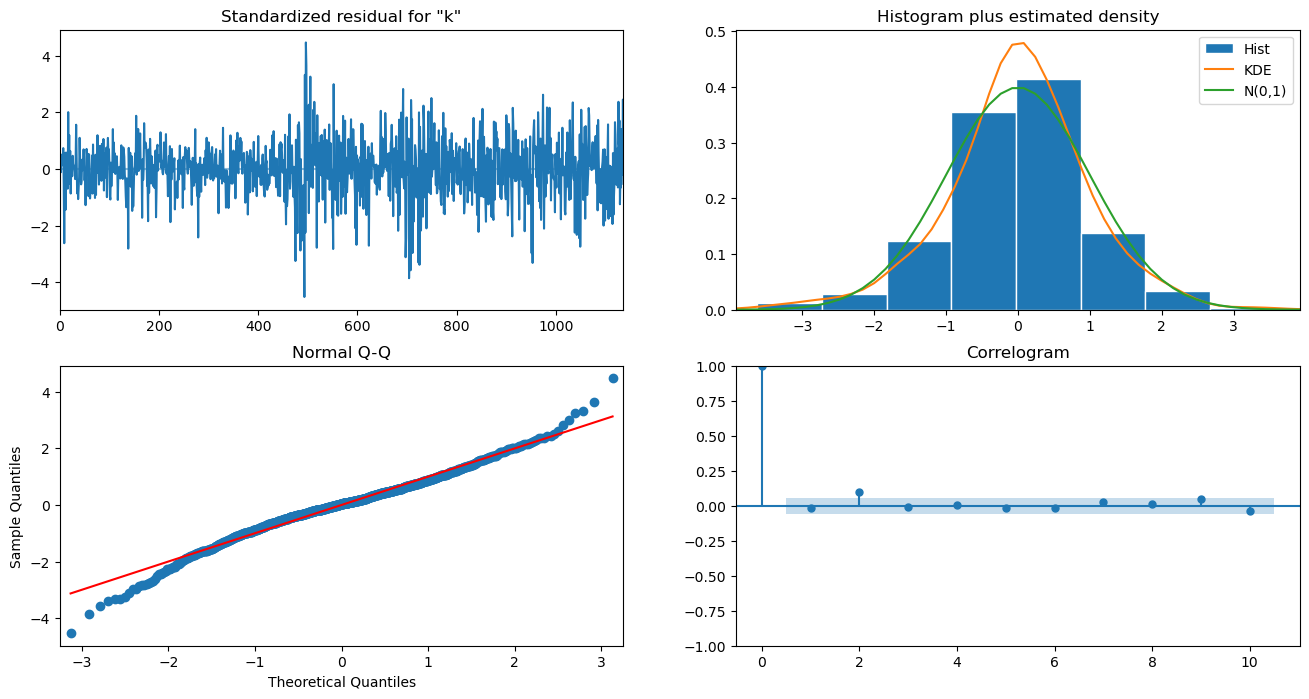

In [37]:
from pylab import rcParams
import statsmodels.api as sm
import warnings
import itertools
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

SARIMAMonth = sm.tsa.statespace.SARIMAX(df_kospi['kospi_cost'], order=(0, 1, 0), seasonal_order=(2, 1, 0, 12) ,enforce_stationarity=False,enforce_invertibility=False)

SARIMA_results_month = SARIMAMonth.fit()

SARIMA_results_month.plot_diagnostics(figsize=(16, 8))
plt.show()

20.81752280144126


C:\anaconda3\envs\bhoon\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


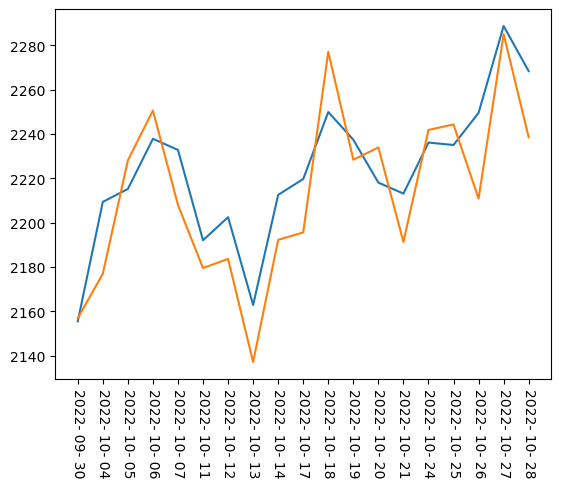

In [63]:
# 2017년 12개월 데이터로 예측
SARIMA_predict_month_1 = SARIMA_results_month.predict(start=1156,end=1174)

# RMSE를 살펴 봄
RMSE_Month_Seasonal_ARIMA  = np.sqrt(mean_squared_error(SARIMA_predict_month_1, test)) 
print(RMSE_Month_Seasonal_ARIMA)

# test 데이터와 예측 결과치를 비교
SARIMA_predict_month_1.index = test.index
plt.plot(test)
plt.plot(SARIMA_predict_month_1)
plt.xticks(rotation =270)
plt.show()

In [56]:
test

2022- 09- 30    2155.49
2022- 10- 04    2209.38
2022- 10- 05    2215.22
2022- 10- 06    2237.86
2022- 10- 07    2232.84
2022- 10- 11    2192.07
2022- 10- 12    2202.47
2022- 10- 13    2162.87
2022- 10- 14    2212.55
2022- 10- 17    2219.71
2022- 10- 18    2249.95
2022- 10- 19    2237.44
2022- 10- 20    2218.09
2022- 10- 21    2213.12
2022- 10- 24    2236.16
2022- 10- 25    2235.07
2022- 10- 26    2249.56
2022- 10- 27    2288.78
2022- 10- 28    2268.40
Name: kospi_cost, dtype: float64